In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('dataset/train.csv')
print(df_train.columns)
df_train.head()


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


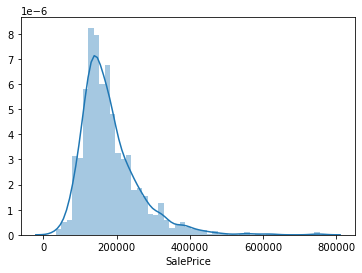

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()
#check the decoration
df_train.columns
sns.distplot(df_train['SalePrice']);
#print("dimension of df_train data: {}".format(df_train.shape))
#print(df_train.groupby('SalePrice').size())

In [ ]:
def preProcessing(df):
    df = df.dropna(axis = 1)
    df.head()
    return df
df_train = preProcessing(df_train)
df_train.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
def labeling(df):
    #Labeling non numerical columns
    from sklearn.preprocessing import LabelEncoder

    lb_make = LabelEncoder()
    columns = df.columns.values
    df[:] = np.nan_to_num(df)
    for column in columns:
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
                df[column] = lb_make.fit_transform(df[column])
    df.head()
    return df
df_train = labeling(df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [ ]:
X = np.array(df_train.loc[:, df_train.columns != 'SalePrice'])
y = np.array(df_train['SalePrice'])
print (X)
print (y)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.33)#Controls the shuffling applied to the data before applying the split

[[   1   60    3 ... 2008    8    4]
 [   2   20    3 ... 2007    8    4]
 [   3   60    3 ... 2008    8    4]
 ...
 [1458   70    3 ... 2010    8    4]
 [1459   20    3 ... 2010    8    4]
 [1460   20    3 ... 2008    8    4]]
[208500 181500 223500 ... 266500 142125 147500]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time


def get_clf_results(clf, param_grid, X_train, y_train, clf_name):
    clf_cv = GridSearchCV(clf, param_grid=param_grid)
    stime = time.time()
    clf_cv.fit(X_train, y_train)
    print ("\n################"+clf_name+"####################")
    print("Time for "+clf_name+" fitting: %.3f" % (time.time() - stime))
    print("Best parameters set found on development set:")
    print(clf_cv.best_params_)
    print("Accuracy on training set: {:.3f}".format(clf_cv.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(clf_cv.score(X_test, y_test)))


# Set the parameters by cross-validation
"""
tuned_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
"""

#OLS
from sklearn.linear_model import LinearRegression
clf_ols = LinearRegression()
clf_ols.fit(X_train, y_train)
print ("########## OLS ############")
print("Accuracy on training set: {:.3f}".format(clf_ols.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_ols.score(X_test, y_test)))

#Ridge
from sklearn.linear_model import Ridge
clf_Ridge = Ridge(alpha=1.0)
clf_Ridge.fit(X_train, y_train)
print ("\n########## Ridge ############")
print("Accuracy on training set: {:.3f}".format(clf_Ridge.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_Ridge.score(X_test, y_test)))


#Kernel Ridge
from sklearn.kernel_ridge import KernelRidge
clf_Kernel_ridge = KernelRidge(alpha=1.0)
clf_Kernel_ridge.fit(X_train, y_train)
print ("\n########## Kernel Ridge ############")
print("Accuracy on training set: {:.3f}".format(clf_Kernel_ridge.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_Kernel_ridge.score(X_test, y_test)))

#CV Kernel Ridge
param_grid = {"alpha": [10, 1e0, 1e-1, 1e-2, 1e-3],
              "kernel": ['rbf', 'linear']}
get_clf_results(KernelRidge(), param_grid, X_train, y_train, "CV Kernel Ridge")


#Lasso
from sklearn.linear_model import Lasso
clf_lasso = Lasso(alpha=0.1)
clf_lasso.fit(X_train, y_train)
print ("\n########## Lasso ############")
print("Accuracy on training set: {:.3f}".format(clf_lasso.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_lasso.score(X_test, y_test)))

#CV Lasso
param_grid = {"alpha": [10, 1e0, 1e-1, 1e-2, 1e-3]}
get_clf_results(Lasso(), param_grid, X_train, y_train, "CV Lasso")

#Enet
from sklearn.linear_model import ElasticNet
clf_enet = ElasticNet(random_state=0)
clf_enet.fit(X_train, y_train)
print ("\n########## Enet ############")
print("Accuracy on training set: {:.3f}".format(clf_enet.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_enet.score(X_test, y_test)))

#CV Enet

param_grid = {"alpha": [30, 20, 10, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}
get_clf_results(ElasticNet(random_state=0), param_grid, X_train, y_train, "CV Enet")
param_grid = {"l1_ratio": np.arange(0, 1, 0.1)}
get_clf_results(ElasticNet(random_state=0, max_iter=1000000, tol=1e-10), param_grid, X_train, y_train, "CV Enet L1 Ratio")

########## OLS ############
Accuracy on training set: 0.847
Accuracy on test set: 0.799

########## Ridge ############
Accuracy on training set: 0.847
Accuracy on test set: 0.799

########## Kernel Ridge ############
Accuracy on training set: 0.846
Accuracy on test set: 0.799

################CV Kernel Ridge####################
Time for CV Kernel Ridge fitting: 0.666
Best parameters set found on development set:
{'alpha': 10, 'kernel': 'linear'}
Accuracy on training set: 0.846
Accuracy on test set: 0.800

########## Lasso ############
Accuracy on training set: 0.847
Accuracy on test set: 0.799

################CV Lasso####################
Time for CV Lasso fitting: 0.141
Best parameters set found on development set:
{'alpha': 10}
Accuracy on training set: 0.847
Accuracy on test set: 0.798

########## Enet ############
Accuracy on training set: 0.830
Accuracy on test set: 0.797

################CV Enet####################
Time for CV Enet fitting: 1.533
Best parameters set found on deve